In [31]:
# Naive Bayes Classification on Daily Health Dataset

#This notebook implements a **Gaussian Naive Bayes classifier from scratch**
#using NumPy and applies it to a real-world health dataset.

#The goal is to predict whether a day is **healthy or not** based on daily habits.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [33]:
df = pd.read_excel("daily_health_dataset.xlsx")
df.head()


,sleep_hours,water_liters,exercise_minutes,steps,junk_food,stress_level,healthy_day
0,7.6,2.8,27,10967,0,2,1
1,6.8,1.8,57,8748,1,5,0
2,7.8,3.1,54,11817,0,2,1
3,8.8,1.5,25,2417,1,5,0
4,6.7,2.7,36,10306,0,3,1


In [34]:
X = df.drop(columns=["healthy_day"]).values
y = df["healthy_day"].values

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.mean_ = np.zeros((n_classes, n_features))
        self.var_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.mean_[idx] = X_c.mean(axis=0)
            self.var_[idx] = X_c.var(axis=0) + 1e-9  # 🔒 stability
            self.priors_[idx] = X_c.shape[0] / n_samples

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        posteriors = []

        for idx, _ in enumerate(self.classes_):
            prior = np.log(self.priors_[idx])

            pdf = self._pdf(idx, x)
            pdf = np.clip(pdf, 1e-9, None)  # 🔒 prevent log(0)

            likelihood = np.sum(np.log(pdf))
            posteriors.append(prior + likelihood)

        return self.classes_[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.mean_[class_idx]
        var = self.var_[class_idx]
        return np.exp(-((x - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)


In [38]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

In [39]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 8],
       [0, 7]])

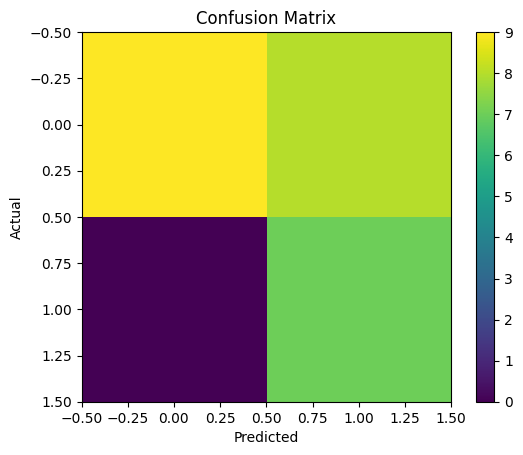

In [41]:
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

In [42]:
print("Accuracy:", np.mean(y_pred == y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666

Confusion Matrix:
 [[9 8]
 [0 7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        17
           1       0.47      1.00      0.64         7

    accuracy                           0.67        24
   macro avg       0.73      0.76      0.66        24
weighted avg       0.84      0.67      0.68        24

